# ***Project Team ID :*** *PTID-CDS-FEB-24-1829*

    
#### ***Project Name:***  *Insurance Cost Prediction*

#### ***Project id:*** *PRCP-1021-InsCostPred*

## **Problem Statement:-**

***Task 1:-***                                                                                                              
* Prepare a complete data analysis report on the given data.

***Task 2:-***                                                                
* Prepare the data, identifying and extracting key features (both input and output parameters) relevant to the problem you will solve.                  
* Build and train a machine learning model. Here you can evaluate different algorithms, settings and see which model is best for your scenario.

***Task 3:-***  
* Create a machine learning model to predict the insurance price charged to the customer. 
* The charge depends on various features such as age, type of coverage, amount of coverage needed, gender, body mass index (BMI), region, and other special factors like smoking to determine what health risks the person possesses.


# Domain Analysis

*In the domain analysis for the insurance price prediction project, key columns such as 'age,' 'sex,' 'BMI' (Body Mass Index), 'children,' 'smoker,' 'region,' and 'charges' play pivotal roles in shaping insurance outcomes.*

*Here's a consolidated breakdown:*

**Demographic Factors:**

- *Age:* Correlates with health risks, driving experience (for auto insurance), and life expectancy.
- *Sex:* May impact insurance rates, particularly in health and life insurance.
- *BMI (Body Mass Index):* A numerical measure reflecting body fat, influencing health risk assessments and premium calculations.
- *Children:* Number of dependents affecting health and life insurance premiums.

**Lifestyle and Habits:**

- *Smoker:* Smoking habits as a significant factor influencing health risks and life insurance premiums.

**Geographical Factors:**

- *Region:* Location-based factors affecting insurance rates, considering natural disaster risks and regional health trends.

**Outcome Variable:**

- *Charges (Premiums):* Directly reflects the amount paid for insurance coverage, serving as the key outcome variable.

**BMI Categories:**

- *Underweight:* BMI < 18.5
- *Normal weight:* 18.5 ≤ BMI ≤ 24.9
- *Overweight:* 25 ≤ BMI ≤ 29.9
- *Obese:* BMI ≥ 30

**Health Risks Associated with BMI:**

- *Higher BMI (Overweight and Obesity):*
  - Cardiovascular issues
  - Type 2 Diabetes
  - Joint problems
  - Respiratory issues
  - Cancer risk
- *Lower BMI (Underweight):*
  - Nutritional deficiencies
  - Weakened immune system
  - Osteoporosis
  - Fertility issues

**BMI and Insurance Impact:**

- Higher BMI may result in elevated premiums due to perceived health risks.
- Underwriting processes often consider BMI as a factor in determining coverage terms.
- Policies may include exclusions related to weight-related conditions or treatments.
- Individuals with abnormal BMI might seek higher coverage, impacting overall insurance costs.

**Additional Considerations:**

- Insurance Coverage Components: Different types of coverage (health, auto, life) and their specific components impacting premiums.
- Risk Factors: Factors like occupation, lifestyle choices, and driving record influencing the overall risk profile.
- Historical Data: Past insurance claims and their frequency impacting future premium calculations.
- Policy Details: Coverage amount, type of coverage, deductible amount influencing premium costs.

*This consolidated domain analysis provides a robust foundation for developing an insurance price prediction model. By considering these diverse factors, the model can offer nuanced predictions, improving accuracy and reliability in estimating insurance premiums.*


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
# load the data 
data=pd.read_csv('insurance.csv')

In [3]:
# check the first 10th Rows in data
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# check the last 10th Rows in data
data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
# all columns Name
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
# Value Counts of Each Columns
print('Value Counts:- ')
print()
print(f'{data.sex.value_counts()}')
print()
print(f'{data.region.value_counts()}')
print()
print(f'{data.smoker.value_counts()}')
print()
print(f'{data.children.value_counts()}')

Value Counts:- 

sex
male      676
female    662
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

smoker
no     1064
yes     274
Name: count, dtype: int64

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [7]:
# shape of Data(Columns,Rows)
data.shape

(1338, 7)

In [8]:
# Total No of columns with Data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# No Any Null Value Value
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Statistical calculations with Data,mean,median,std devivation,Q1,Q2,Q3
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.describe(include='O')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


# EDA-(Exploratory Data Analysis)

## Univariate Analysis

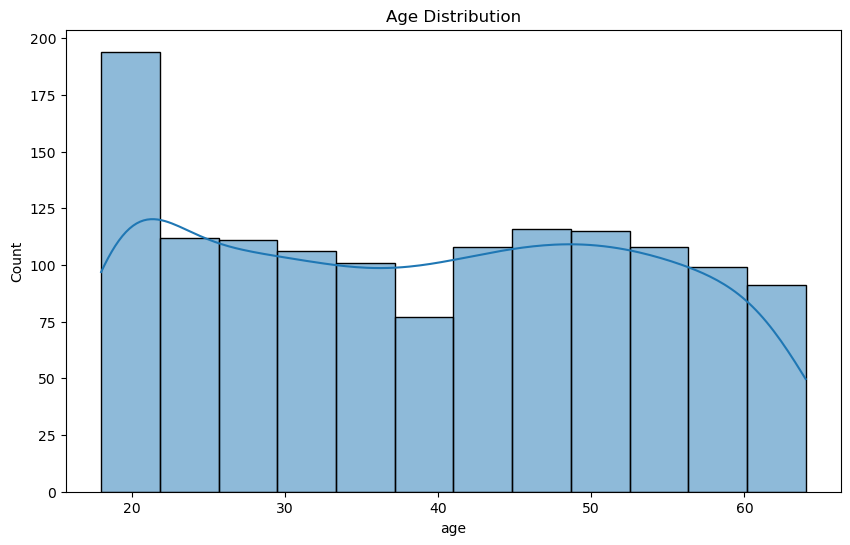

In [12]:
# Age Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['age'], kde=True)
plt.title('Age Distribution')
plt.show()

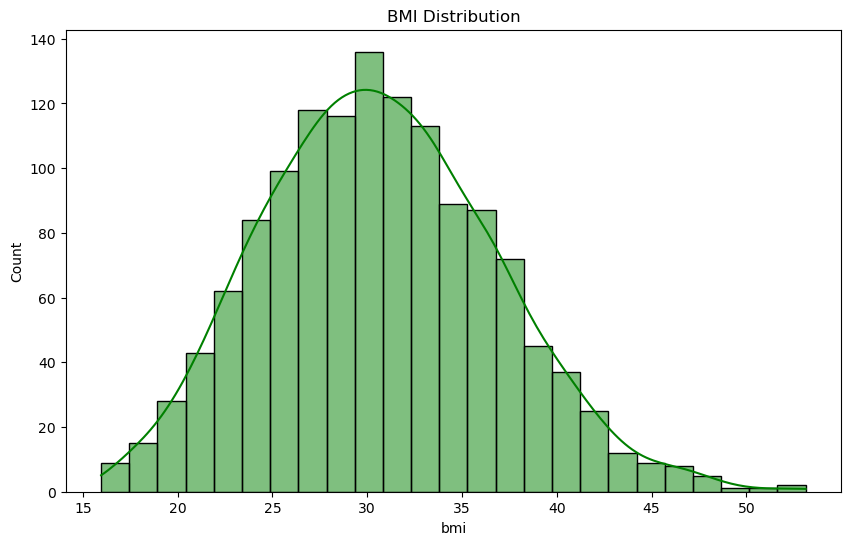

In [13]:
# BMI Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['bmi'],kde=True,color='green')
plt.title('BMI Distribution')
plt.show()

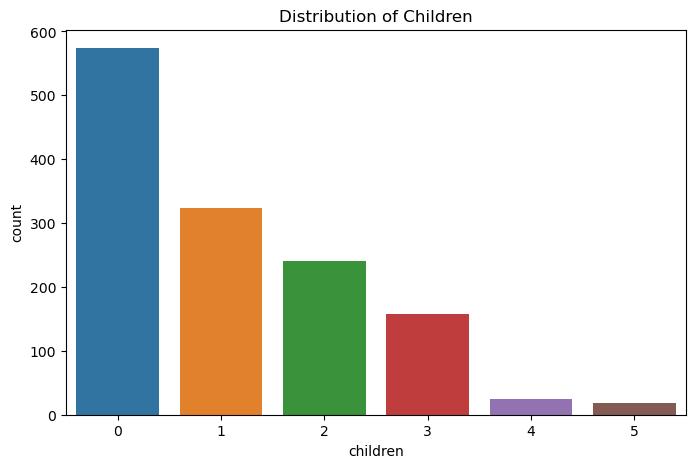

In [14]:
# Children Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='children',data=data)
plt.title('Distribution of Children')
plt.show()

### Most of the olicy holders have no children

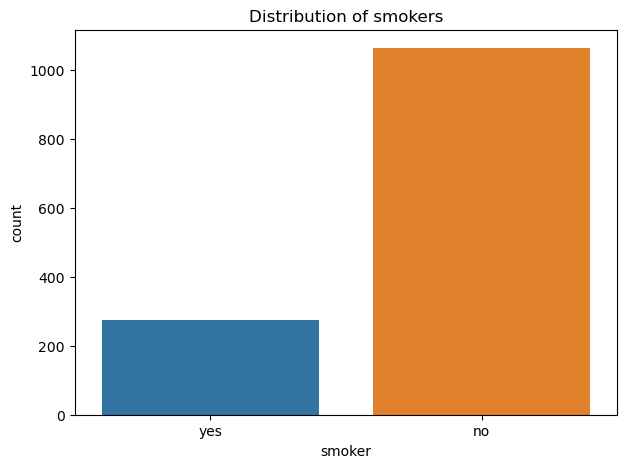

In [15]:
# Smoker Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='smoker',data=data)
plt.title('Distribution of smokers')
plt.show()

### The total sum of coverage value of non smoker is slightly more than smokers.So we can say that insurance companies prefer to give higher coverage value to non smokers as compared to smokers

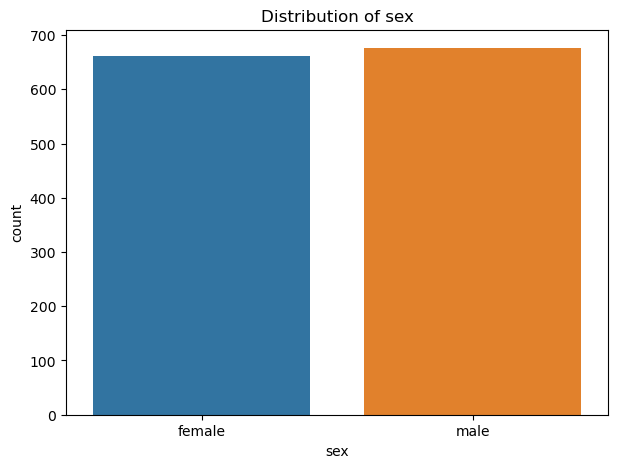

In [16]:
# Smoker Distribution
plt.figure(figsize=(7,5))
sns.countplot(x='sex',data=data)
plt.title('Distribution of sex')
plt.show()

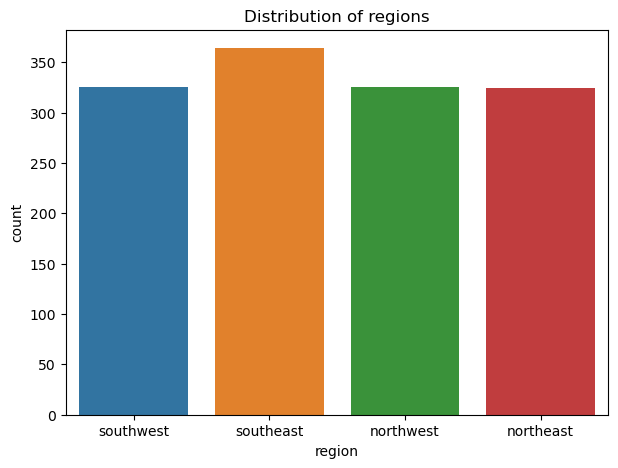

In [17]:
# Smoker Regions
plt.figure(figsize=(7,5))
sns.countplot(x='region',data=data)
plt.title('Distribution of regions')
plt.show()

### southeast region has highest number of policy holders as compared to other regions

 ## Bi-Variate Analysis:-

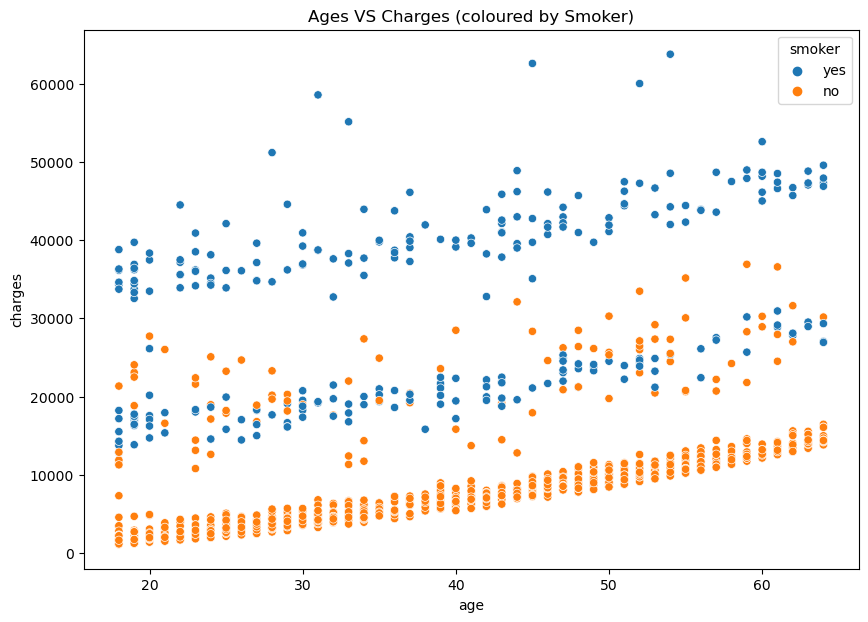

In [18]:
# Age vs. Charges
plt.figure(figsize=(10,7))
sns.scatterplot(x='age',y='charges',hue='smoker',data=data)
plt.title('Ages VS Charges (coloured by Smoker)')
plt.show()

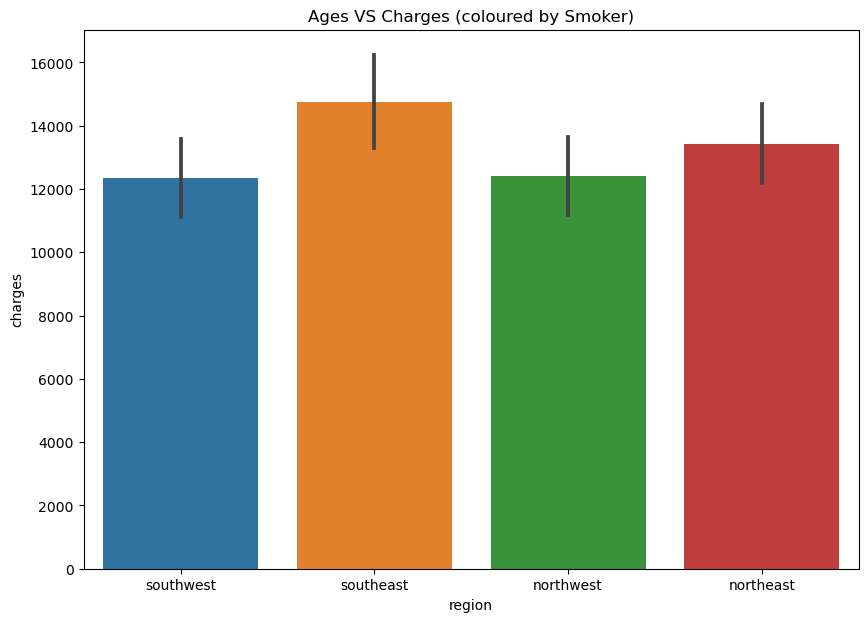

In [19]:
# Regions vs. Charges
plt.figure(figsize=(10,7))
sns.barplot(data,x='region',y='charges')
plt.title('Ages VS Charges (coloured by Smoker)')
plt.show()

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

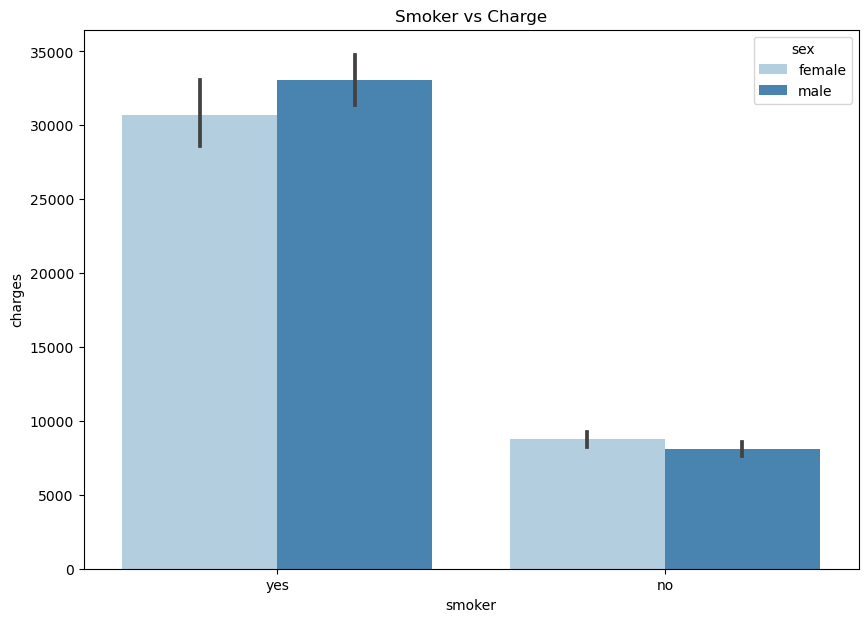

In [20]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,palette='Blues',hue='sex')

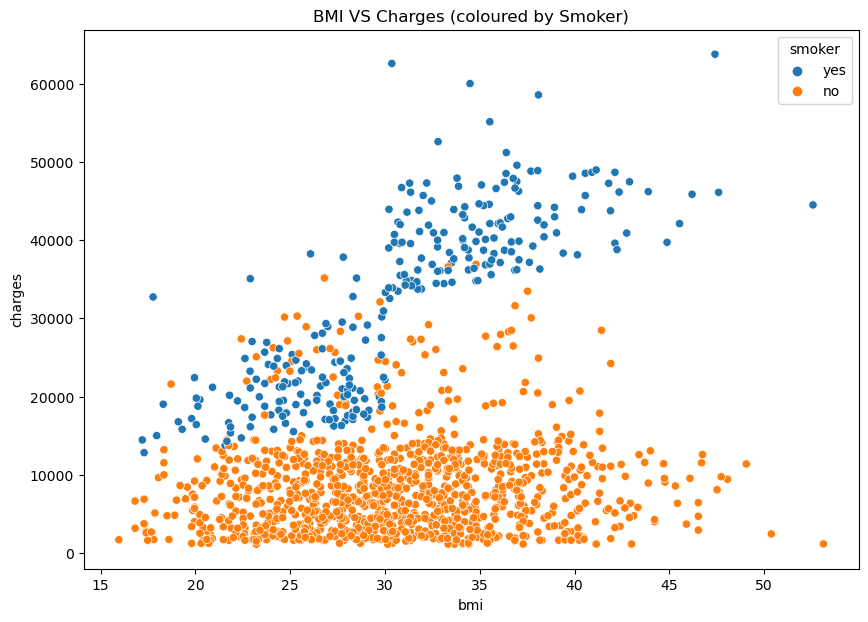

In [21]:
# BMI VS Charges
plt.figure(figsize=(10,7))
sns.scatterplot(x='bmi',y='charges',hue='smoker',data=data)
plt.title('BMI VS Charges (coloured by Smoker)')
plt.show()

In [22]:
# Boxplot

### Sweetviz

In [23]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Data Preprocessing

# Outlier Handling

In [24]:
def out1(num_out):
    q1=(num_out).quantile(0.25)
    q3=(num_out).quantile(0.75)
    iqr=q3-q1
    lower=q1-(1.5)*iqr
    upper=q3+(1.5)*iqr
    
    return lower,upper

In [25]:
lower,upper=out1(data['bmi'])
print(lower, upper)

13.7 47.290000000000006


In [26]:
lower, upper = out1(data['bmi'])
print(lower, upper)

data = data[(data['bmi'] > lower) & (data['bmi'] < upper)]
data

13.7 47.290000000000006


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
data.shape

(1329, 7)

# Converting categorical variables into numerical variables

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [29]:
data['sex'] = label.fit_transform(data['sex'])

In [30]:
data['smoker'] = label.fit_transform(data['smoker'])

In [31]:
data.region.value_counts()

region
southeast    357
northwest    325
southwest    324
northeast    323
Name: count, dtype: int64

In [32]:
data['region_encoded']=data.region.map({'southeast':0,'northwest':1,'southwest':2,'northeast':3})

In [33]:
data.drop(['region'],axis=1,inplace=True)

In [34]:
data.head()

,age,sex,bmi,children,smoker,charges,region_encoded
0,19,0,27.900,0,1,16884.92400,2
1,18,1,33.770,1,0,1725.55230,0
2,28,1,33.000,3,0,4449.46200,0
3,33,1,22.705,0,0,21984.47061,1
4,32,1,28.880,0,0,3866.85520,1


# Feature Selection

In [35]:
# Heatmap
correlation_matrix = data.corr()
correlation_matrix

,age,sex,bmi,children,smoker,charges,region_encoded
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.302022,0.009883
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.063394,-0.004053
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.193196,-0.203911
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.069739,-0.003890
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,0.785912,-0.038085
charges,0.302022,0.063394,0.193196,0.069739,0.785912,1.000000,-0.038201
region_encoded,0.009883,-0.004053,-0.203911,-0.003890,-0.038085,-0.038201,1.000000


<Axes: >

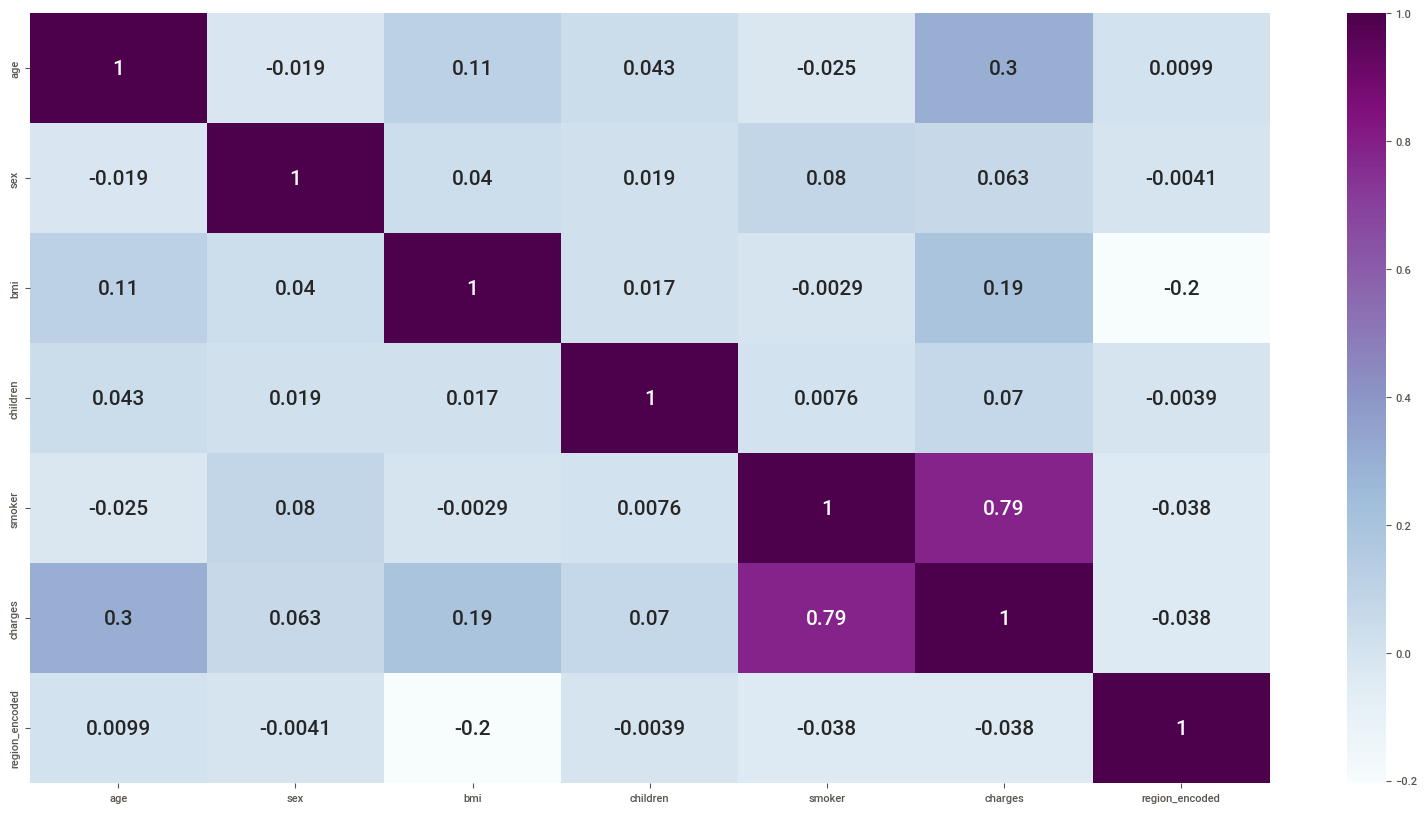

In [36]:
# checking the co-relation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,cmap='BuPu',annot_kws={"size":15})

# Scaling the features

In [37]:
X = data.drop(columns=['charges'])
y= data['charges']

In [38]:
X

,age,sex,bmi,children,smoker,region_encoded
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,2


In [39]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

# 'X' are input features and 'y' is target variable/output

# Split data into 80% training and 20% testing
X_train, X_test , y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.preprocessing import MinMaxScaler
std_model=MinMaxScaler()
X_train=std_model.fit_transform(X_train)
X_test=std_model.transform(X_test)

In [42]:
X_train

array([[0.80434783, 1.        , 0.54700716, 0.        , 0.        ,
        0.33333333],
       [0.67391304, 1.        , 0.46649317, 0.        , 0.        ,
        0.66666667],
       [0.52173913, 1.        , 0.49756018, 0.        , 0.        ,
        0.33333333],
       ...,
       [0.15217391, 0.        , 0.15744958, 0.2       , 0.        ,
        0.66666667],
       [0.        , 1.        , 0.69388419, 0.        , 0.        ,
        0.        ],
       [0.2173913 , 1.        , 0.58100195, 0.        , 0.        ,
        0.33333333]])

In [43]:
X_test

array([[0.02173913, 0.        , 0.21324008, 0.        , 0.        ,
        0.33333333],
       [0.91304348, 1.        , 0.41102798, 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.30904359, 0.        , 0.        ,
        1.        ],
       ...,
       [0.7826087 , 1.        , 0.50878334, 0.        , 0.        ,
        0.66666667],
       [0.32608696, 0.        , 0.40045543, 0.2       , 0.        ,
        0.        ],
       [0.69565217, 1.        , 0.30383865, 0.        , 0.        ,
        0.        ]])

# Model Building

# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score

In [45]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

In [46]:
# Evaluate Linear Regression Model

# Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)

# Calculate R2 Score
r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Squared Error (MSE): {mse:}')
print(f'Mean Absolute Error (MAE): {mae:}')
print(f'R2 Score: {r2:.2f}')

Mean Squared Error (MSE): 34317740.85762514
Mean Absolute Error (MAE): 4052.702587175339
R2 Score: 0.77


# Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create a DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=3)

#hyperparameters
params = {
    "criterion": ["mse", "friedman_mse", "mae"],  
    "splitter": ["best", "random"],
    "max_depth": list(range(1, 20)),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(1, 20)),
}

dt_regressor_cv = GridSearchCV(dt_regressor, params, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=3)

dt_regressor_cv.fit(X_train, y_train)

best_params = dt_regressor_cv.best_params_
print(f"Best parameters: {best_params}")

# Get the best regressor
best_dt_regressor = dt_regressor_cv.best_estimator_

y_pred = best_dt_regressor.predict(X_test)

Fitting 3 folds for each of 6498 candidates, totalling 19494 fits
Best parameters: {'criterion': 'friedman_mse', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'best'}


In [48]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Squared Error: {mse:}")
print(f"Root Mean Squared Error: {rmse:}")

Mean Squared Error: 21317212.020421457
Root Mean Squared Error: 4617.0566403739795


In [49]:
# R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 score is: {r2:}")

R2 score is: 0.8560954626904128


# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

In [51]:
# Evaluate Model

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

25084107.56124405
0.8306665576639803


# Model Comparison report

In [52]:
df = pd.DataFrame()
df['Model'] = ['Linear_Regression','Decision_Tree','Random Forest']
df['R2score'] = [0.77,0.85,0.83]
df

,Model,R2score
0,Linear_Regression,0.77
1,Decision_Tree,0.85
2,Random Forest,0.83


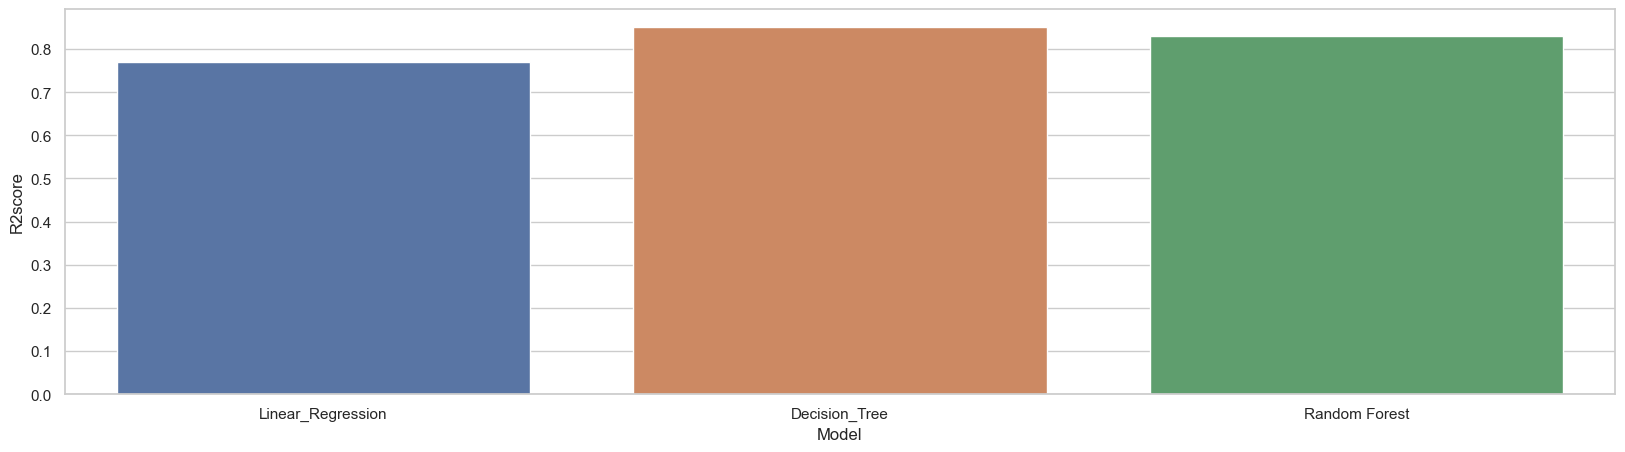

In [53]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(x='Model',y = 'R2score',data = df)

# Deployment

In [58]:
import os
import pickle

folder_name = 'Internship'
file_name = 'model.pkl'

model = {'key': 'value'}

file_path = os.path.join(folder_path, file_name)
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

print(f'Model saved successfully to: {file_path}')

Model saved successfully to: C:\Users\PRAJWAL\Downloads\Internship\Internship\model.pkl


# Challenges Faced:

- Model Training Time Discrepancy: One notable challenge was the considerable difference in the training time of the Decision Tree model compared to other models. This disparity in computational requirements warrants further investigation for optimization.

- Outlier Handling: Managing outliers posed a challenge, initially addressed through the z-score method. However, the persistence of outliers led to the adoption of the IQR method for more effective outlier removal. This iterative process underscored the importance of robust data preprocessing techniques.

# Conclusion:

- In this data science project, we delved into predicting health insurance costs, identifying age, BMI, smoking status, and region as pivotal factors influencing the pricing. The project aimed to leverage a robust dataset, employing thorough data exploration, feature engineering, and model development to enhance predictive accuracy.

- Through meticulous analysis, we uncovered the significant impact of demographic and lifestyle factors on insurance costs. The insights gained contribute to a deeper understanding of the intricacies involved in health insurance pricing.